<a href="https://colab.research.google.com/github/maulitayasmin/PCVK_2024_18/blob/main/Week6_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Nama : Maulita Yasmin Nadila
* Absen : 18
* Kelas : 3E
*   NIM : 2241720010



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

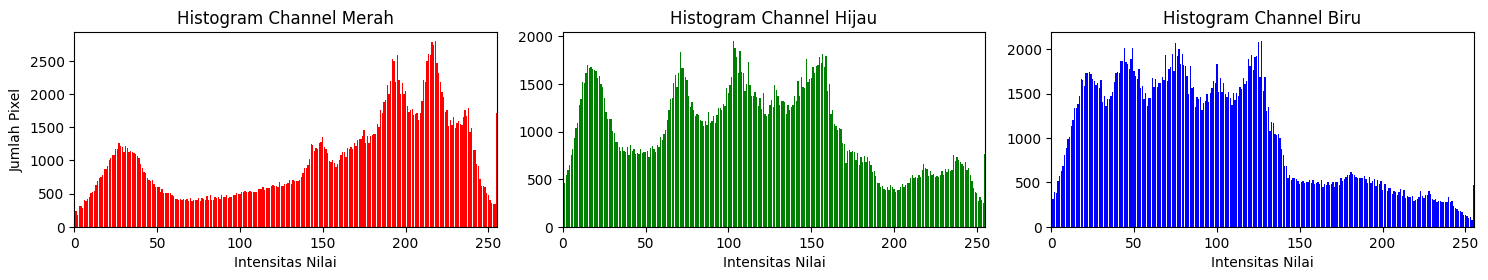

In [31]:
image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Memisahkan channel warna
red_channel = image[:, :, 2]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 0]

# Menghitung histogram untuk masing-masing channel menggunakan cv2.calcHist
red_hist = cv.calcHist([red_channel], [0], None, [256], [0, 256])
green_hist = cv.calcHist([green_channel], [0], None, [256], [0, 256])
blue_hist = cv.calcHist([blue_channel], [0], None, [256], [0, 256])

# Mengubah histogram ke format yang bisa ditampilkan dengan bar
red_hist = red_hist.flatten()
green_hist = green_hist.flatten()
blue_hist = blue_hist.flatten()

# Membuat plot histogram sebagai bar histogram
plt.figure(figsize=(15, 5))

# Histogram Merah
plt.subplot(2, 3, 1)
plt.bar(range(256), red_hist, color='red')
plt.title('Histogram Channel Merah')
plt.xlabel('Intensitas Nilai')
plt.ylabel('Jumlah Pixel')
plt.xlim([0, 255])

# Histogram Hijau
plt.subplot(2, 3, 2)
plt.bar(range(256), green_hist, color='green')
plt.title('Histogram Channel Hijau')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Histogram Biru
plt.subplot(2, 3, 3)
plt.bar(range(256), blue_hist, color='blue')
plt.title('Histogram Channel Biru')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Menampilkan plot
plt.tight_layout()
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

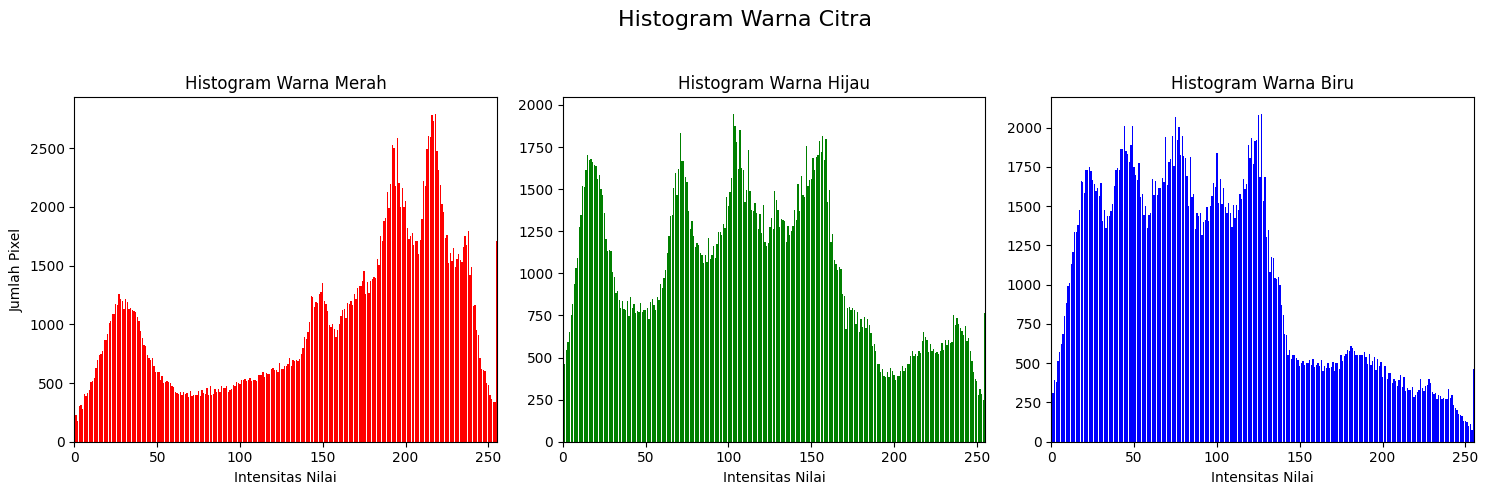

In [32]:
# Mengubah citra ke format RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Memisahkan channel warna
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Menghitung histogram untuk masing-masing channel
red_hist, bins_red = np.histogram(red_channel, bins=256, range=[0, 256])
green_hist, bins_green = np.histogram(green_channel, bins=256, range=[0, 256])
blue_hist, bins_blue = np.histogram(blue_channel, bins=256, range=[0, 256])

# Membuat plot histogram dengan gaya yang diinginkan
plt.figure(figsize=(15, 5))

# Histogram Red
plt.subplot(1, 3, 1)
plt.bar(range(256), red_hist, color='red')
plt.title('Histogram Warna Merah')
plt.xlabel('Intensitas Nilai')
plt.ylabel('Jumlah Pixel')
plt.xlim([0, 255])

# Histogram Green
plt.subplot(1, 3, 2)
plt.bar(range(256), green_hist, color='green')
plt.title('Histogram Warna Hijau')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Histogram Blue
plt.subplot(1, 3, 3)
plt.bar(range(256), blue_hist, color='blue')
plt.title('Histogram Warna Biru')
plt.xlabel('Intensitas Nilai')
plt.xlim([0, 255])

# Menambahkan judul utama
plt.suptitle('Histogram Warna Citra', fontsize=16)

# Menampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

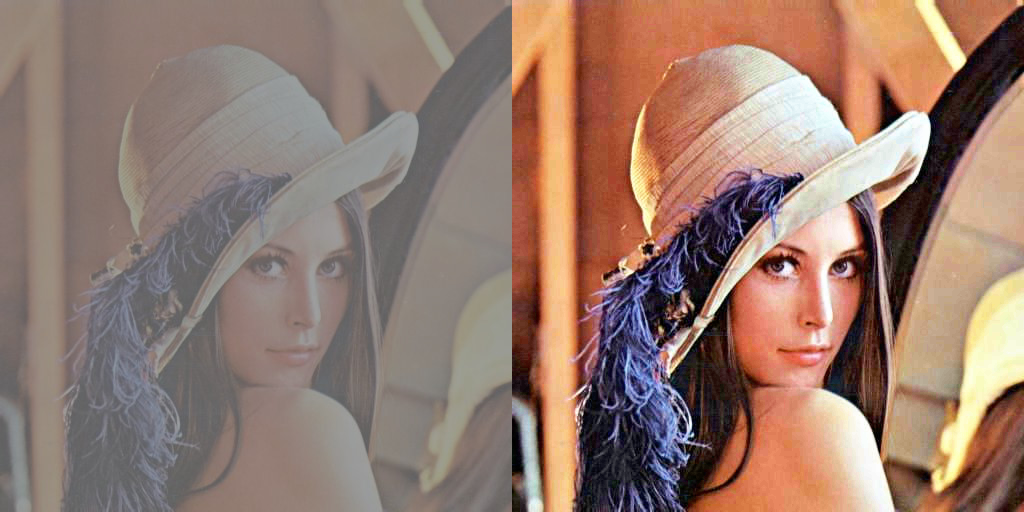

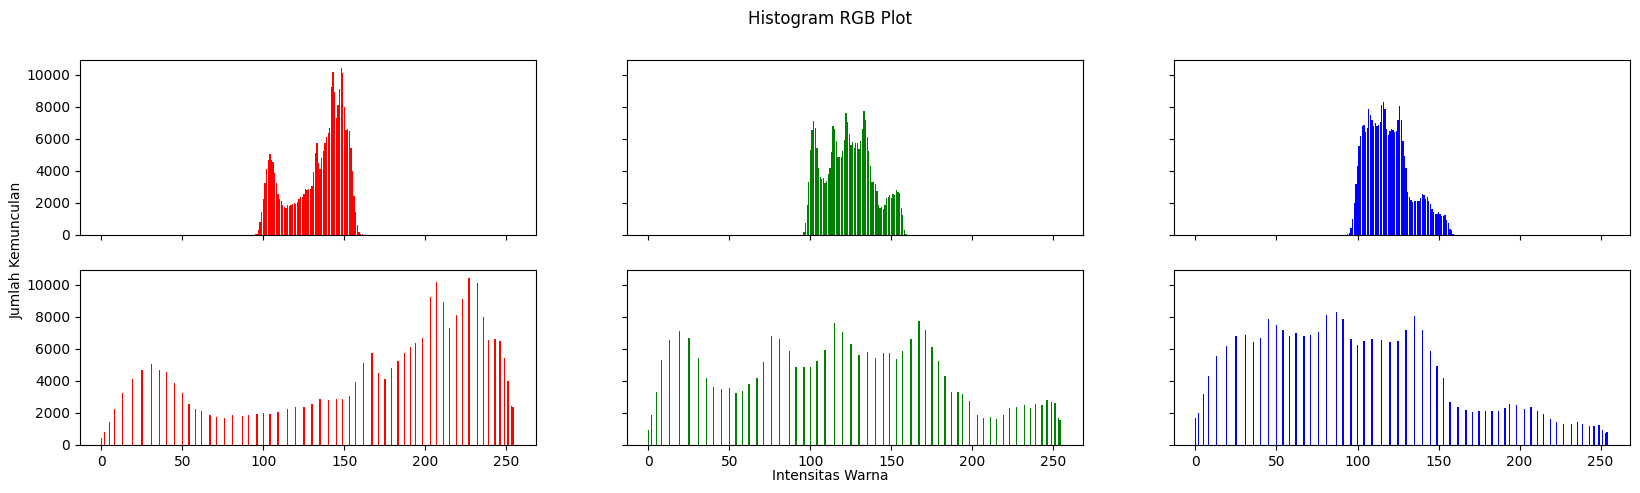

In [33]:
# Load the image
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Function to calculate histogram of each color channel
def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))  # For storing histograms of R, G, B channels
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1  # Blue channel
            ax[1][img1[y][x][1]] += 1  # Green channel
            ax[2][img1[y][x][2]] += 1  # Red channel
    return ax

# Calculate original histogram
histo_asli = histog(img1)

# Convert image to a Numpy array
img_array = np.asarray(img1)

# Step 1: Normalize cumulative histogram
histogram_array = np.bincount(img_array.flatten(), minlength=256)
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels  # Normalize

# Cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 3: Apply the transformation to equalize the image
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array  # Equalized image

# Calculate histogram for equalized image
equal_histo = histog(img2)

# Concatenate the original and equalized images
final_frame = cv.hconcat((img1, img2))  # Concatenate horizontally
cv2_imshow(final_frame)  # Display the concatenated image

# Determine if the image is grayscale by checking if all channels are equal
blue, green, red = img1[:, :, 0], img1[:, :, 1], img1[:, :, 2]
isgrayimg = np.array_equal(blue, green) and np.array_equal(green, red)

names = np.arange(256)  # Intensity values
if not isgrayimg:
    # If the image is not grayscale, plot histograms for each color channel
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original image histograms (R, G, B)
    axs[0, 0].bar(names, histo_asli[2], color='red')   # Red channel
    axs[0, 1].bar(names, histo_asli[1], color='green') # Green channel
    axs[0, 2].bar(names, histo_asli[0], color='blue')  # Blue channel

    # Plot equalized image histograms (R, G, B)
    axs[1, 0].bar(names, equal_histo[2], color='red')   # Red channel
    axs[1, 1].bar(names, equal_histo[1], color='green') # Green channel
    axs[1, 2].bar(names, equal_histo[0], color='blue')  # Blue channel
else:
    # If the image is grayscale, plot only grayscale histograms
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original and equalized grayscale histograms
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

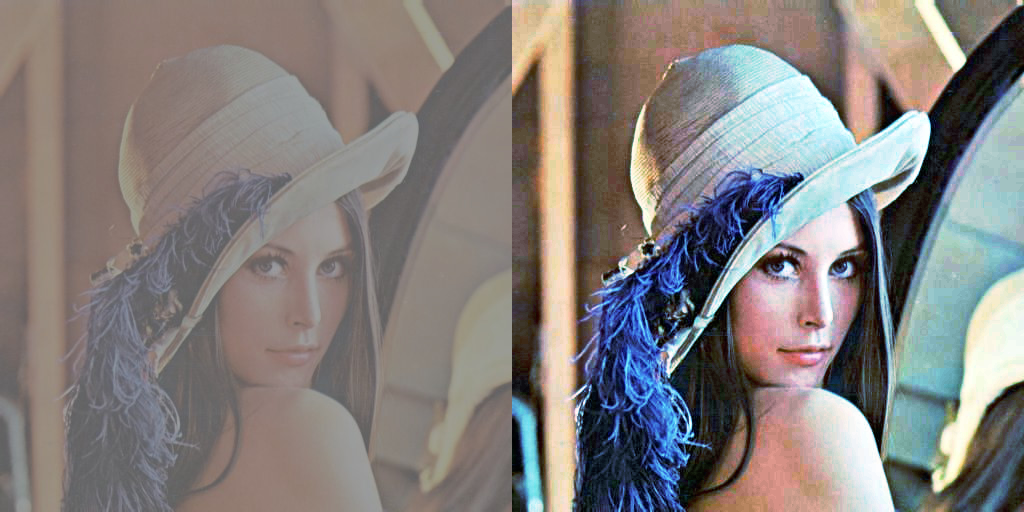

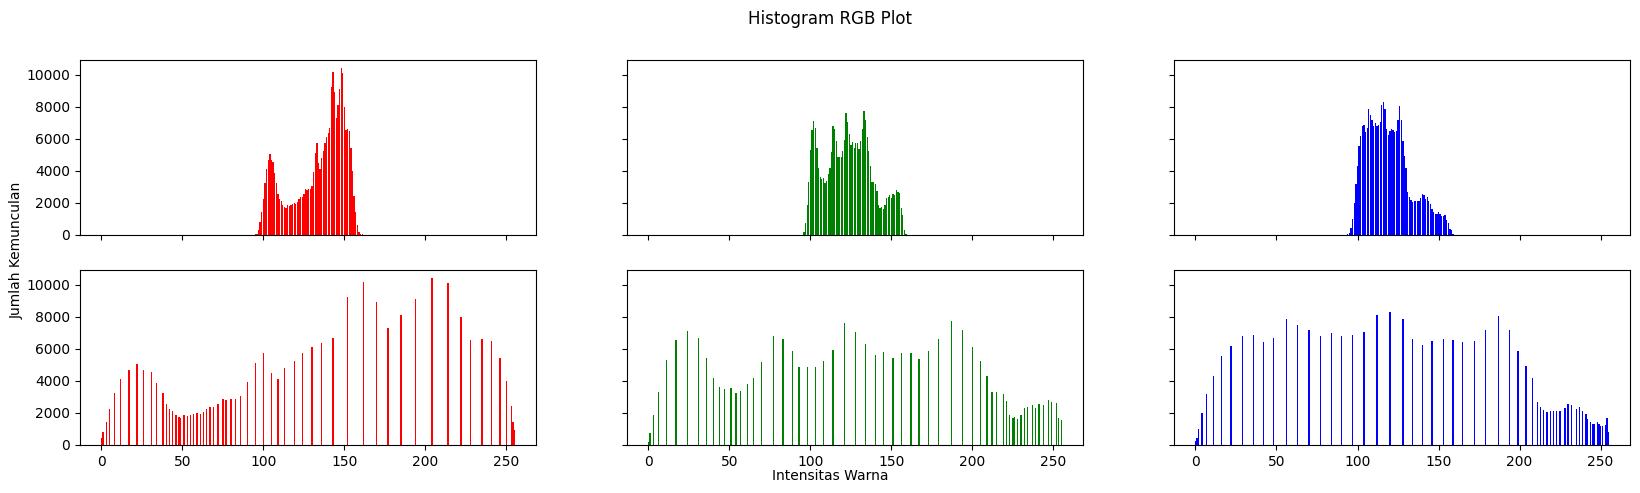

In [34]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Split the image into its color channels
channels = cv.split(img1)

# Apply histogram equalization to each channel
eq_channels = []
for ch in channels:
    eq_channels.append(cv.equalizeHist(ch))

# Merge equalized channels back into an image
eq_image = cv.merge(eq_channels)

# Function to calculate histogram
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1  # Blue channel
            ax[1][img[y][x][1]] += 1  # Green channel
            ax[2][img[y][x][2]] += 1  # Red channel
    return ax

# Calculate histograms
histo_asli = histog(img1)
equal_histo = histog(eq_image)

# Concatenate original and equalized images for display
final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)  # Display the concatenated image

# Check if the image is grayscale
blue, green, red = img1[:, :, 0], img1[:, :, 1], img1[:, :, 2]
isgraying = np.array_equal(blue, green) and np.array_equal(green, red)

# Plot histograms
names = np.arange(256)
if not isgraying:
    # If the image is not grayscale, plot RGB histograms
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original histograms (R, G, B)
    axs[0, 0].bar(names, histo_asli[2], color='red')   # Red channel
    axs[0, 1].bar(names, histo_asli[1], color='green') # Green channel
    axs[0, 2].bar(names, histo_asli[0], color='blue')  # Blue channel

    # Plot equalized histograms (R, G, B)
    axs[1, 0].bar(names, equal_histo[2], color='red')   # Red channel
    axs[1, 1].bar(names, equal_histo[1], color='green') # Green channel
    axs[1, 2].bar(names, equal_histo[0], color='blue')  # Blue channel
else:
    # If the image is grayscale, plot grayscale histograms
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale Plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

    # Plot original and equalized grayscale histograms
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

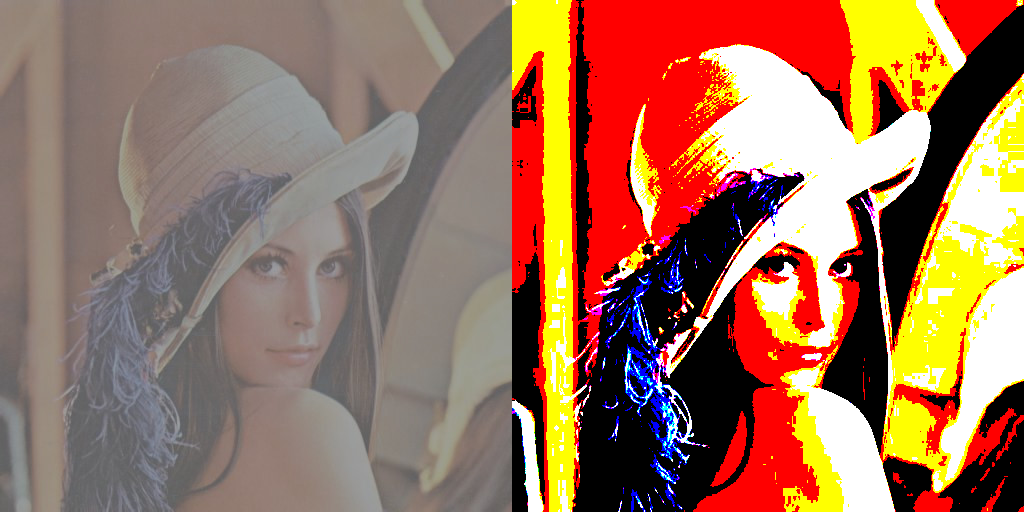

In [37]:
img_1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

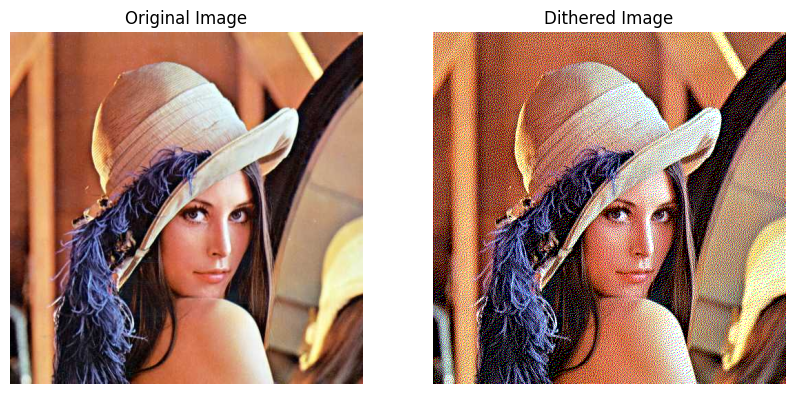

In [40]:
import cv2
# Load the image
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Display the original and dithered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

def threshold(value):
    """Ensure the pixel value is within the range of 0 to 255."""
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg_dithering(image):
    """Apply Floyd-Steinberg dithering to the input RGB image."""
    height, width, channels = image.shape
    # Create a copy of the image to store the dithered output
    dithered_image = np.zeros((height, width, channels), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            for c in range(channels):  # Process each color channel
                # Get the old pixel value
                pixel_old = image[y, x, c]
                # Calculate the new pixel value based on thresholding
                pixel_new = threshold(round(pixel_old / 255.0) * 255)
                dithered_image[y, x, c] = pixel_new

                # Calculate the error
                error = pixel_old - pixel_new

                # Distribute the error to neighboring pixels
                if x + 1 < width:
                    image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7 / 16)
                if y + 1 < height:
                    if x > 0:  # R3
                        image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3 / 16)
                    image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5 / 16)
                    if x + 1 < width:  # R4
                        image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1 / 16)

    return dithered_image

# Apply Floyd-Steinberg dithering
dithered_image = floyd_steinberg_dithering(image)


plt.subplot(1, 2, 2)
plt.title('Dithered Image')
plt.imshow(cv2.cvtColor(dithered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

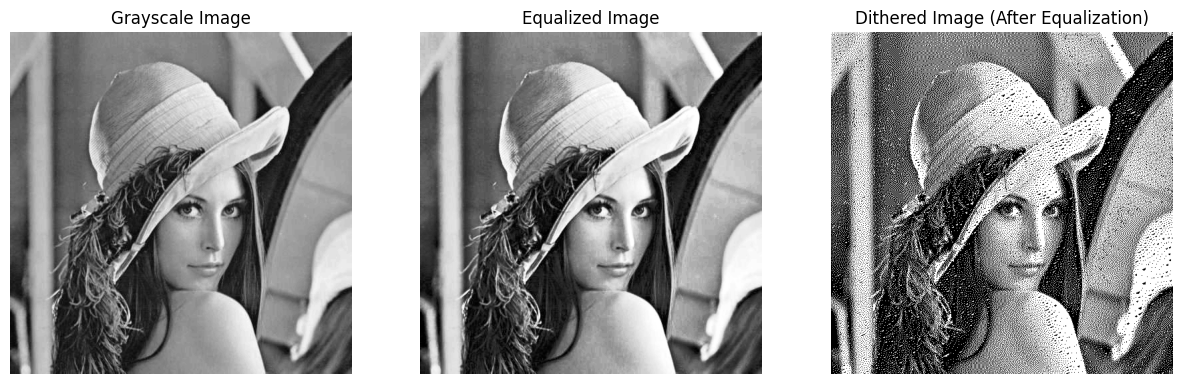

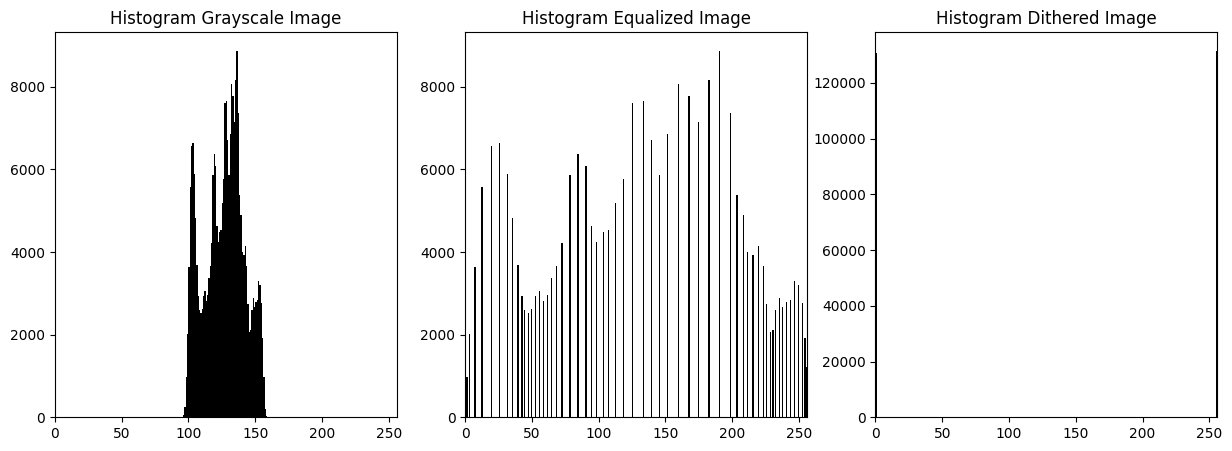

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#Membaca gambar asli
img_eq_path = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
original_image = cv.imread(img_eq_path)
original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)  # Konversi ke RGB

# Mengubah gambar ke grayscale
gray_image = cv.cvtColor(original_image, cv.COLOR_RGB2GRAY)

# 3. Histogram Equalization
equalized_image = cv.equalizeHist(gray_image)

# Fungsi Dithering Floyd-Steinberg
def floyd_steinberg_dithering(image):
    height, width = image.shape
    dithered = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_pixel = image[y, x]
            new_pixel = 255 * (old_pixel > 127)  # Thresholding
            dithered[y, x] = new_pixel

            # Hitung error
            quant_error = old_pixel - new_pixel

            # Sebarkan error ke piksel tetangga
            if x < width - 1:  # Kanan
                image[y, x + 1] += quant_error * 7 / 16
            if y < height - 1:  # Bawah
                image[y + 1, x] += quant_error * 5 / 16
            if x > 0 and y < height - 1:  # Kiri bawah
                image[y + 1, x - 1] += quant_error * 3 / 16
            if x < width - 1 and y < height - 1:  # Kanan bawah
                image[y + 1, x + 1] += quant_error * 1 / 16

    return dithered

# 4. Terapkan dithering pada gambar yang telah di-equalization
dithered_image = floyd_steinberg_dithering(equalized_image.copy())

# 5. Menampilkan gambar asli, hasil equalization, dan hasil dithering
plt.figure(figsize=(15, 5))

# Gambar
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Dithered Image (After Equalization)')
plt.axis('off')

plt.show()

# 6. Membuat histogram
plt.figure(figsize=(15, 5))

# Histogram untuk Grayscale Image
plt.subplot(1, 3, 1)
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Grayscale Image')
plt.xlim([0, 256])

# Histogram untuk Equalized Image
plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Equalized Image')
plt.xlim([0, 256])

# Histogram untuk Dithered Image
plt.subplot(1, 3, 3)
plt.hist(dithered_image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Dithered Image')
plt.xlim([0, 256])

plt.show()